## Importing Necessary Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

## Loading Dataset

In [63]:
data_df=pd.read_csv("creditcard.csv")

In [64]:
data_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [65]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Feature Engg And EDA

In [66]:
data_df.shape

(284807, 31)

In [67]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [68]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [69]:
data_df[['Amount','Time','Class']].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [70]:
data_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [71]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## Visualization

Text(0.5, 1.0, 'Amount vs Time')

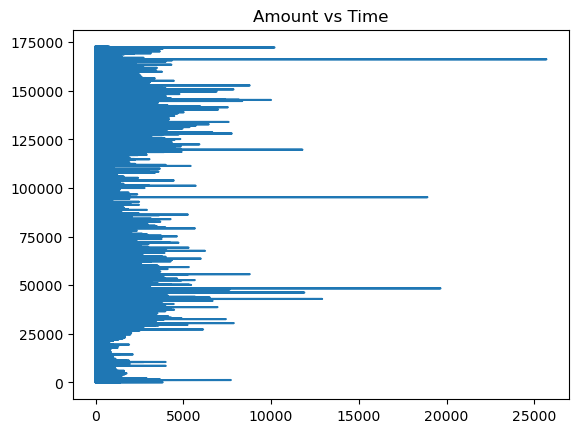

In [72]:
x=data_df['Amount']
y=data_df['Time']
plt.plot(x,y)
plt.title('Amount vs Time')

C:\Users\nimisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


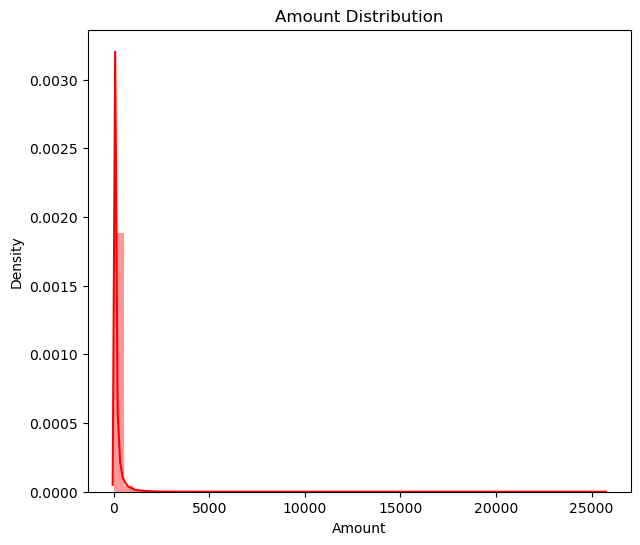

In [73]:
plt.figure(figsize=(7,6),)
plt.title('Amount Distribution')
sns.distplot(data_df['Amount'],color='red');

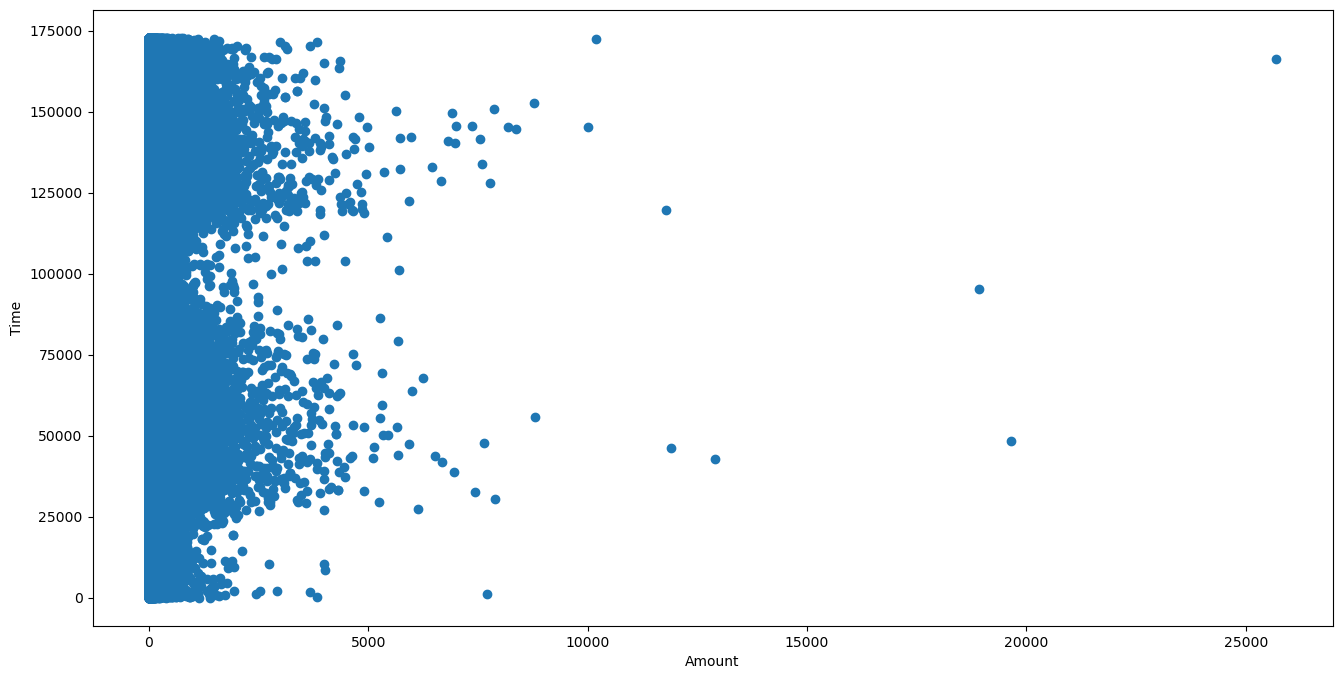

In [74]:
fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(data_df['Amount'],data_df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

## Separating Data

In [101]:
x=data.drop(labels=['Class'],axis=1)

In [76]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [77]:
y=data['Class']

In [78]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

## Training Model And Evaluation

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [80]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
155901,106747.0,-2.602736,3.233501,-0.838055,-1.409871,1.230347,-0.661659,1.997824,-1.438753,4.941971,...,2.393492,-0.545701,0.905435,-0.167763,0.399760,-0.123918,-0.380538,1.066589,-0.107950,1.51
67865,52728.0,1.177960,0.598357,0.058019,2.450490,0.272170,-0.399654,0.404360,-0.070068,-0.860490,...,-0.273709,-0.000288,-0.058489,-0.062129,0.049819,0.611549,0.101869,-0.032584,0.004587,6.85
105369,69486.0,1.255692,0.332685,0.299863,0.696526,-0.398132,-1.080260,0.067211,-0.187309,0.076694,...,-0.099085,-0.290835,-0.853914,0.132711,0.337381,0.206115,0.095361,-0.025019,0.030231,1.98
66934,52284.0,-0.408166,-2.234631,0.009439,3.296471,-1.102454,0.520619,0.806571,0.029892,-0.116651,...,1.286877,0.193827,-1.166745,-0.555936,0.048271,-0.043573,-0.228531,-0.134184,0.156359,790.32
78118,57378.0,-1.203790,1.127604,1.981966,2.956650,-0.371467,0.760772,-0.186645,0.931599,-1.309664,...,0.178444,-0.119011,-0.436420,0.019902,0.163180,-0.009868,0.126390,0.210535,0.041926,37.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124308,77251.0,-0.390949,0.645081,1.807926,0.294589,-0.964396,0.469075,-0.869203,0.845024,-0.203394,...,-0.091443,0.439924,1.223555,0.014514,0.087276,-0.731931,0.590091,-0.027049,-0.021847,2.43
178569,123686.0,1.907907,0.479859,-0.501296,3.952424,0.235164,-0.138849,0.147492,-0.120471,-0.654093,...,-0.300858,0.078559,0.416350,0.080719,0.046150,0.135518,0.094091,-0.025760,-0.050050,7.58
31962,36583.0,-1.348556,0.520128,2.141873,-0.763311,-0.949095,-0.665653,-0.445462,0.714302,0.480202,...,-0.076507,0.111249,0.197968,-0.261393,0.425189,0.232573,1.058556,0.093555,0.014727,4.50
220060,142004.0,2.005341,0.056725,-1.604193,0.683026,-0.096109,-2.132530,0.771516,-0.591995,0.400012,...,-0.305285,0.194655,0.727446,0.024505,0.966197,0.414241,-0.125686,-0.058846,-0.063499,21.79


In [81]:
x_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
77035,56856.0,1.318392,-0.105040,-1.584156,-0.853686,2.210923,3.015105,-0.262990,0.673595,-0.133735,...,0.063004,-0.109173,-0.472847,-0.102333,1.054699,0.673950,0.613936,-0.070777,-0.001630,23.00
276661,167232.0,-0.105768,1.387263,0.713417,4.087771,1.632197,2.109126,0.554156,0.420893,-2.352400,...,0.128952,0.417066,1.297321,-0.107371,-0.327467,-0.557528,0.607940,0.225749,0.177486,19.55
68729,53115.0,-0.668710,-0.587460,2.402915,-0.309677,-1.083073,0.701044,0.161696,0.172244,0.749767,...,0.479049,0.338281,0.994155,0.237667,0.070985,-0.668727,1.034652,-0.096415,-0.058827,183.73
259664,159217.0,-0.379486,3.115978,-2.068118,4.696062,2.473696,-0.077852,1.255012,0.165052,-3.155195,...,0.260787,-0.041069,-0.200079,-0.375151,-0.322631,0.041930,0.502868,-0.065028,0.191425,7.56
279524,168926.0,1.961343,-0.715029,-1.703147,-0.613582,1.713865,3.913136,-1.252671,1.054911,1.314417,...,-0.143399,0.191787,0.691780,0.158595,0.726621,-0.060118,-0.192346,0.060914,-0.042846,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50563,44544.0,1.158053,0.001696,0.211422,0.482572,-0.307330,-0.521246,0.030230,-0.033624,-0.114498,...,-0.031486,-0.153945,-0.604155,-0.004874,-0.013078,0.292219,0.174126,-0.052590,0.008085,48.00
246815,153340.0,-1.370128,0.891204,-0.110672,-1.117024,1.336468,-0.804511,1.222698,0.300315,-1.065605,...,-0.138302,0.268253,0.442383,-0.595779,0.736954,1.411335,-0.080462,-0.179249,-0.104623,29.00
278732,168395.0,-3.296759,1.417242,-0.731343,-0.578284,0.723411,-1.355353,0.717710,0.008977,0.570532,...,-0.252616,-0.563243,-0.778801,0.261055,1.089634,0.186622,0.145205,0.058836,0.616599,5.85
25717,33734.0,0.688735,-0.253590,-0.356527,1.527506,-0.227617,-0.393717,0.237484,0.087884,-0.158852,...,0.238796,0.199450,0.057606,-0.270540,0.083440,0.413773,-0.299725,-0.002387,0.079586,228.00


In [82]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [83]:
scaled_train=scaler.fit_transform(x_train)
scaled_test=scaler.transform(x_test)

In [84]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(scaled_train,y_train)

GaussianNB()

In [85]:
from sklearn.metrics import accuracy_score 
y_pred=clf.predict(scaled_test)
accuracy_score(y_test,y_pred)*100

97.80764585264458

In [86]:
param_grid={"var_smoothing":[0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
gs=GridSearchCV(clf,param_grid=param_grid,cv=5,verbose=3)

In [89]:
gs.fit(scaled_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .................var_smoothing=0.1;, score=0.980 total time=   0.5s
[CV 2/5] END .................var_smoothing=0.1;, score=0.978 total time=   0.4s
[CV 3/5] END .................var_smoothing=0.1;, score=0.980 total time=   0.5s
[CV 4/5] END .................var_smoothing=0.1;, score=0.980 total time=   0.4s
[CV 5/5] END .................var_smoothing=0.1;, score=0.980 total time=   0.4s
[CV 1/5] END ...............var_smoothing=0.001;, score=0.978 total time=   0.4s
[CV 2/5] END ...............var_smoothing=0.001;, score=0.976 total time=   0.4s
[CV 3/5] END ...............var_smoothing=0.001;, score=0.978 total time=   0.4s
[CV 4/5] END ...............var_smoothing=0.001;, score=0.979 total time=   0.4s
[CV 5/5] END ...............var_smoothing=0.001;, score=0.979 total time=   0.4s
[CV 1/5] END .................var_smoothing=0.5;, score=0.986 total time=   0.4s
[CV 2/5] END .................var_smoothing=0.5;

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.1, 0.001, 0.5, 0.05, 0.01, 1e-08,
                                           1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=3)

In [90]:
gs.best_params_

{'var_smoothing': 0.5}

In [91]:
from sklearn.naive_bayes import GaussianNB
clf1 = GaussianNB(var_smoothing=0.5)
clf1.fit(scaled_train,y_train)
y_pred1=clf1.predict(scaled_test)
accuracy_score(y_test,y_pred1)*100

98.4888064941996

In [93]:
from sklearn.ensemble import RandomForestClassifier
rs=RandomForestClassifier()

In [95]:
rs.fit(scaled_train,y_train)

RandomForestClassifier()

In [96]:
y_pred2=rs.predict(scaled_test)
accuracy_score(y_test,y_pred2)*100

99.95786635206876

In [97]:
param_grid_rf = { "n_estimators": [50,100,130,200],
                    "max_depth": range(3,11,1),
                    "random_state":[0,50,100],
                     "criterion":['gini',"entropy"]
                     }

In [98]:
gs1=GridSearchCV(rs,param_grid=param_grid_rf,cv=5,verbose=3)

In [ ]:
gs1.fit(scaled_train,y_train)

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
rs1=RandomForestClassifier(criterion='gini',n_estimators= 1200,random_state=0)
rs1.fit(scaled_train,y_train)
y_pred3=rs1.predict(scaled_test)
accuracy_score(y_test,y_pred3)*100
'''